In [1]:
import json
#Load in cookie
cookies = json.load(open('instagram_data_hwa_2gate.json', 'rb'))
#리스트에 담긴 text 하나로 합치기
texts = sum(cookies['text'], [])

In [2]:
import re
#정규식으로 불필요한 문자 제거
newtexts = ''
for text in texts:
    text = text = re.sub('[0-9]+', '', text)
    text = re.sub('[A-Za-z]+', '', text)
    newtext = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]', '', text)
    newtexts += newtext

In [3]:
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Okt
okt = Okt()
text_list = okt.nouns(newtexts) #명사추출
# text_ph = okt.phrases(newtexts) #어절 추출
# text_mo = okt.morphs(newtexts) #형태소단위 추출
# morphs = nltk.Text(tokens=text_mo)
# print(morphs)
# nouns = nltk.Text(tokens=text_list)
# print(nouns)

In [4]:
from collections import Counter
#단어 개수 세기
count = Counter(text_list)
print(count)

Counter({'거리': 776, '분': 443, '위치': 388, '초': 377, '월': 249, '배우': 246, '오늘': 221, '연극': 194, '수': 193, '공연': 193, '대학로': 186, '시간': 185, '일': 171, '더': 158, '스스': 151, '시': 149, '나': 149, '것': 148, '작업': 146, '때': 133, '준비': 122, '예약': 119, '시작': 119, '이': 118, '내': 111, '스토리': 110, '이야기': 108, '메뉴': 108, '생각': 105, '그': 101, '맛': 99, '사람': 98, '보고': 97, '만': 97, '마지막': 97, '우리': 95, '이번': 93, '책': 91, '진행': 90, '기록': 86, '라이브러리': 85, '작가': 84, '날': 84, '스스러': 84, '사진': 84, '작품': 84, '또': 81, '번': 80, '마음': 78, '곳': 76, '수업': 76, '오후': 75, '년': 73, '하나': 73, '정말': 73, '내일': 72, '공간': 71, '처음': 71, '링크': 70, '진짜': 70, '프로필': 69, '중': 69, '혜화역': 68, '사랑': 67, '쿠키': 66, '아이': 65, '말': 62, '체험': 62, '좀': 61, '위': 60, '방문': 60, '뮤지컬': 60, '친구': 59, '안': 58, '주': 58, '다른': 58, '잡지': 56, '연기': 56, '모두': 55, '다시': 55, '오픈': 54, '한번': 52, '출구': 52, '전': 52, '집': 52, '제': 52, '케이크': 52, '이용': 51, '지금': 51, '꼭': 51, '그림': 51, '위해': 51, '재료': 51, '마로니에': 50, '저': 49, '세': 48, '가지': 47, '공원': 47, 

In [5]:
#count로 빈도수 카운트한 단어 for문 돌려서 사전형태로 만들기
words = dict()
#명사 빈도가 높은 n개 추출.most_common(n)
noun_list = count.most_common(30)
for nouns, counts in noun_list:
    if len(nouns) > 1:
        words[nouns] = counts
    
# words = morphs.vocab().most_common(960) #빈도수 상위 960개 추림
# print(words)

In [6]:
print(words)

{'거리': 776, '위치': 388, '배우': 246, '오늘': 221, '연극': 194, '공연': 193, '대학로': 186, '시간': 185, '스스': 151, '작업': 146, '준비': 122, '예약': 119, '시작': 119, '스토리': 110, '이야기': 108, '메뉴': 108, '생각': 105}


In [7]:
#한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

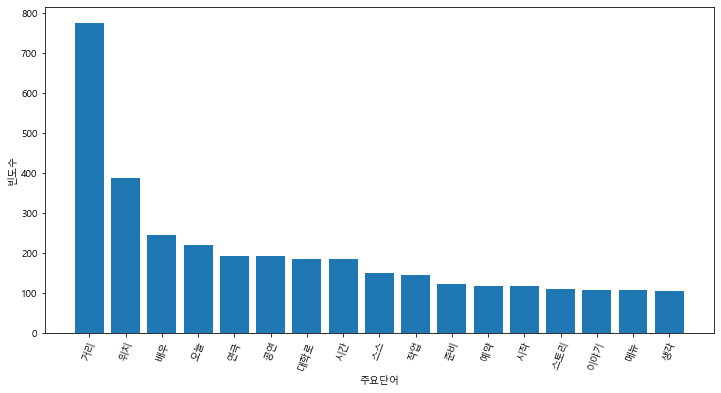

In [8]:
#그래프 사이즈 지정
plt.figure(figsize=(12, 6))
#x,y축 네이밍
plt.xlabel('주요단어')
plt.ylabel('빈도수')
#그래프에 그리드 그리기
# plt.grid(True)
#사전의 값 정렬
Sorted_Dict_Values = sorted(words.values(), reverse=True)
#사전의 키 정렬
Sorted_Dict_Keys = sorted(words, key=words.get, reverse=True)

#bar그래프 그리기
plt.bar(range(len(words)), Sorted_Dict_Values, align='center')
plt.xticks(range(len(words)), list(Sorted_Dict_Keys), rotation='70')

plt.show()